# Wavelets

Theory and practice of wavelets.

We can do this in Python, but it seems only in Python 3.


## Haar wavelets.

We start with the Haar wavelet transform, which is the simplest one to describe. And is actually useful as well. 

The ideas is to start with a vector $\mathbf{x} = [x_1,x_1,x_2,\ldots, x_n]$ and compute sums and differences of pairs, with $$s_{k/2} = x_k + x_{k-1}, $$
$$d_{k/2} = x_k - x_{k-1}, $$
for all even $k$. This gives two output vectors of length $n/2$. In the diagram below, we see a vector of length 1024 decomposed into sums, length 512, and differences, length 512.


![Haar transform, one level](Haar1.png)

We then repeat this process, but only on the sums vector. Do this again and again, always repeating on the sums. IN the next diagram, we see 5 levels of the transform.

![Haar transform, five level](Haar5.png)

First thing to notice is this is an invertible operation. At any stage, the sum and differencing can be undone (This is just an inverse of a 2x2 matrix).

You do need to keep all the difference, and one last sum. So in the above diagram, we need the bottom output vectors at each stage (of lengths 512, 256, 128, 64) and the last sum at the top (length 64), which gives a total of 1024 output points. So the dimensions are right. (1024 dimensions in, 1024 dimensions out). 

Second thing to notice is this transform is fast. At the first stage, we had 512 sums and 512 differences, which is 1024 floating point operations (FLOPS). At the second stage, 512 FLOPS. And so on, so if we went all the way to 10 stages, we would have
$$ 1024 + 512 + 256 + 64 +32 + 16 + 8 + 4 + 2 + 1 = 2*1024 -1$$
FLOPS. In general, for an input vector of length n, we have 2n FLOPS. So the complexity is linear in n.

Third thing to notice if you normalize by scaling with an appropriate factors (divide each sum and difference by $\sqrt{2}$, it is an orthogonal transformation.



## Wavelet packets

Wavelet packets are an extension of the wavelet idea. 

The difference is you apply the wavelet transform to both the sum and difference results at each stage. As in the following diagram. 

![Haar wavelet packet](HaarPack.png)

Note again with the wavelet packets
- this is an invertble operator
- number of operations is $n\log_2(n)$, same speed as FFT.
- in the above example, number of FLOPS is $1024 + 2*512 + 4*256 + 8*128 + 16*64 + \ldots = 10*1024.$
- normalizing by $\sqrt{2}$ again makes this an orthogonal matrix.

So, why the excitement about wavelets?
- it is a fast transform, and orthogonal
- it generalizes to higher dimensions
- it is flexible, as the sums/differences can be replaces with filter banks
- it it observed to be useful in compression. E.g. small coefficients can be discarded without great loss in resolution
- also observed to be useful in many other applications


## Other filter choices.

The sum and difference operators are filters. Sum is a low pass (low frequencies are allowed through, high frequencies are attenuated). Difference is a high pass (high frequencies pass through, not the low.)

Ingrid Daubechies great invention was to notice you could choose your filters by choosing a small number of coefficients, and picking their value to give you all the nice properties you need (high pass, low pass, orthogonality). Two filters are chosen, given by coefficients $h_0, h_1, \ldots, h_{K-1}$ and $g_0, g_1, \ldots, g_{K-1}$. The sum and difference operators are replaced with the formulas
$$ s_{k/2}  = h_0 x_k + h_1 x_{k-1} + h_2 x_{k-2} + \cdots + h_{K-1} x_{k-K+1},$$
$$ d_{k/2}  = g_0 x_k + g_1 x_{k-1} + g_2 x_{k-2} + \cdots + g_{K-1} x_{k-K+1},$$
for all even k. 

The condition for these filters to be lowpass, highpass, and orthogonal result in some algebraic formulas that can be solved by hand (when $K$ is small) or by computer (when $K$ is large). 

Daubechies was the first one to do this systematically, which is why you see many wavelet filters with her name on them. E.g. db1, db2, db3, are the Daubechies filters of length 2, 4, 6 etc. db1 ia also the Haar wavelet filter.

There are other choices for the coefficients that give other useful filters, and are named after the inventors. (Coiflets are named after Coifman, etc.)

## Biorthogonal wavelet transforms

This is a large class of tranform, where you give up on orthogonality of the transform. In this case, there are 4 filters to construct. Two for doing the high and low pass in the forward transform, and two inverse filters for the inverse transform. 

These filters can have different lengths.

The Daubechies 9/7 biorthogonal wavelet transform is used in JPEG2000 image compression. Its filters are of length 9 and 7 terms. 

# Numerical explorations

Let's try out some wavelet transforms in Python

In [46]:
## You need to install the PyWavelets package before you use it.
## Only need to do this once on the server.
# I commented this out, so it doesn't run unless you need it -- take the # signs out below

In [47]:
#%%bash
#pip install  PyWavelets --user

In [48]:
## We load the tools we need, including the wavelet package here
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pywt

The basic wavelet transform takes a vector of length n, and filters it with a lowpass and a highpass filter. Then throws away every second sample, giving two vectors of length n/2 each.

The lowpass result is called the approximate part, the highpass results is called the detail part. 

Here is a very simple example.

In [49]:
x = [1, 2, 3, 4, 5, 6, 7, 8]
cA, cD = pywt.dwt(x, 'db1')

In [50]:
# the sums (remove the root 2 factor)
np.sqrt(2)*cA


array([  3.,   7.,  11.,  15.])

In [51]:
# the differences (remove the root 2 factor)
np.sqrt(2)*cD


array([-1., -1., -1., -1.])

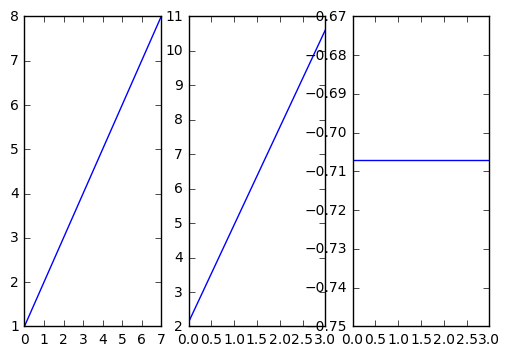

In [52]:
plt.subplot(1, 3, 1)
plt.plot(x)
plt.subplot(1, 3, 2)
plt.plot(cA)
plt.subplot(1, 3, 3)
plt.plot(cD)

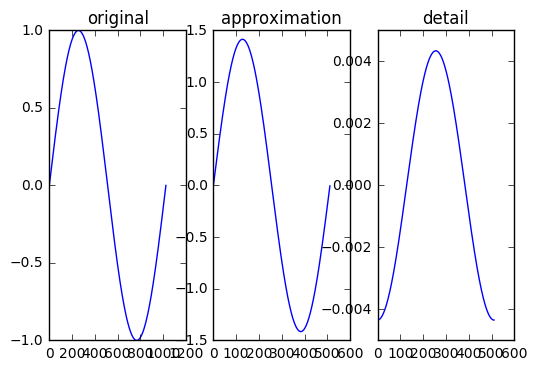

In [53]:
# Lets to a more interesting signal, a simple sine wave
n = 1024
t = np.linspace(0,1,n)
x = np.sin(2*np.pi*t)
cA, cD = pywt.dwt(x,'db1')
plt.subplot(1, 3, 1)
plt.plot(x)
plt.title("original")
plt.subplot(1, 3, 2)
plt.plot(cA)
plt.title("approximation")
plt.subplot(1, 3, 3)
plt.plot(cD)
plt.title("detail")


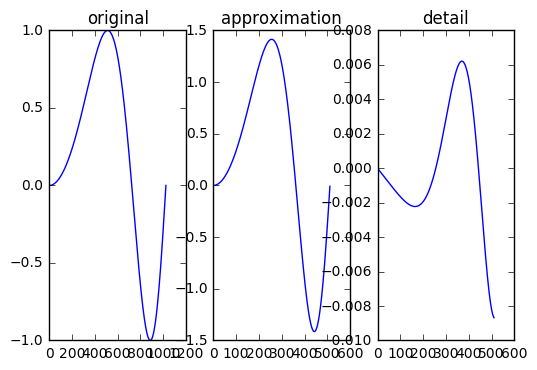

In [54]:
# Lets to a more interesting signal, a ramping sine wave
n = 1024
t = np.linspace(0,1,n)
x = np.sin(2*np.pi*t*t)
cA, cD = pywt.dwt(x,'db1')
plt.subplot(1,3, 1)
plt.plot(x)
plt.title("original")
plt.subplot(1,3, 2)
plt.plot(cA)
plt.title("approximation")
plt.subplot(1,3, 3)
plt.plot(cD)
plt.title("detail")

## Interating the transform
Next step is to repeat the transform. Typically, it is done on the approximation part, and leave the detail part alone.

We do two levels. So the approximation with 512 sample above, gets transformed to an approximation with 256 samples, and a second detail vector of length 256. The 1st detail vector stays the same.

Note the introduction of figsize and tight_layout to make the figures look nicer.


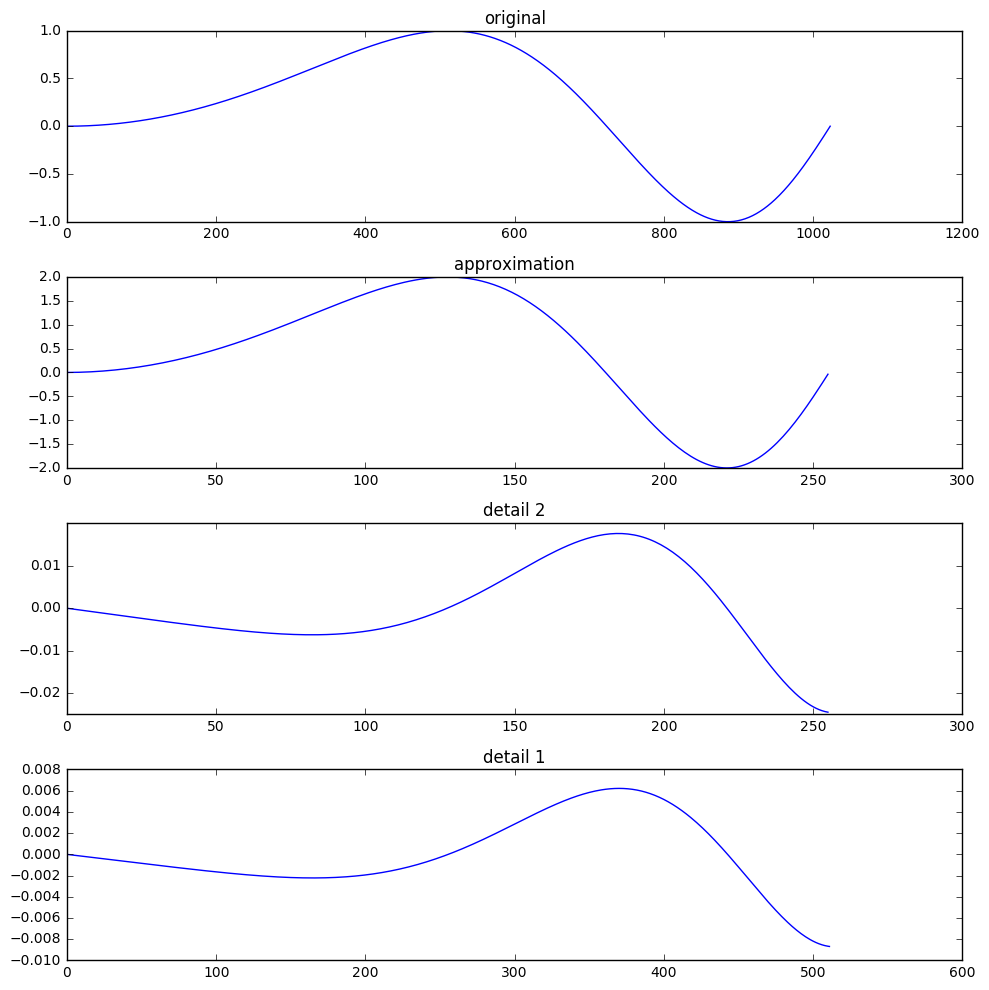

In [55]:
# Lets to a more interesting signal, a ramping sine wave
n = 1024
t = np.linspace(0,1,n)
x = np.sin(2*np.pi*t*t)
cA, cD2, cD1 = pywt.wavedec(x,'db1',level=2)
fig = plt.figure(figsize=(10,10))
plt.subplot(4,1, 1)
plt.plot(x)
plt.title("original")
plt.subplot(4,1, 2)
plt.plot(cA)
plt.title("approximation")
plt.subplot(4,1, 3)
plt.plot(cD2)
plt.title("detail 2")
plt.subplot(4,1, 4)
plt.plot(cD1)
plt.title("detail 1")
plt.tight_layout()

Let's go to three levels, just to see. We include a more rapidly changing signal.

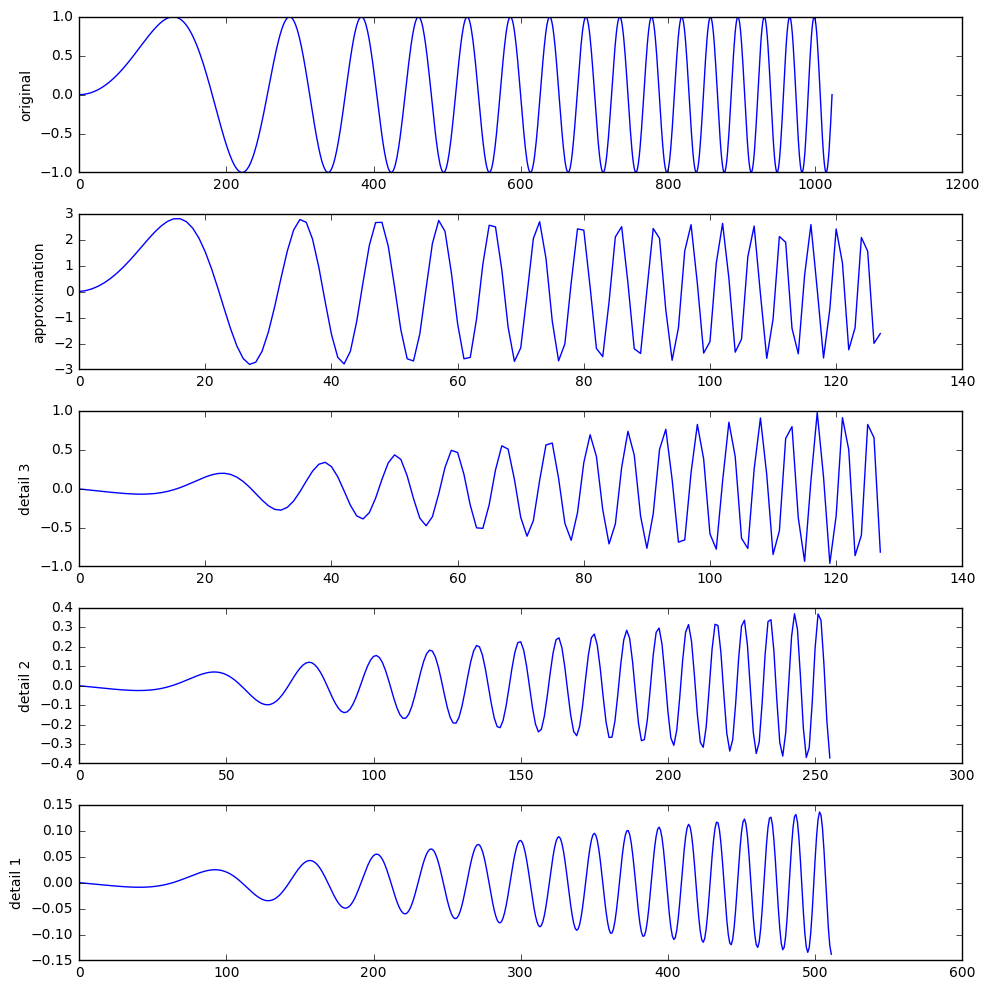

In [56]:
# Lets to a more interesting signal, a ramping sine wave
n = 1024
t = np.linspace(0,4,n)
x = np.sin(2*np.pi*t*t)
cA, cD3, cD2, cD1 = pywt.wavedec(x,'db1',level=3)
fig = plt.figure(figsize=(10,10))
plt.subplot(5,1, 1)
plt.plot(x)
plt.ylabel("original")
plt.subplot(5,1, 2)
plt.plot(cA)
plt.ylabel("approximation")
plt.subplot(5,1, 3)
plt.plot(cD3)
plt.ylabel("detail 3")
plt.subplot(5,1, 4)
plt.plot(cD2)
plt.ylabel("detail 2")
plt.subplot(5,1, 5)
plt.plot(cD1)
plt.ylabel("detail 1")
plt.tight_layout()


Let's do this with a higher order Daubechies wavelets. Change db1 to db2 or db3, or db4.
Observe the detail parts are much smaller at the lower frequencies.

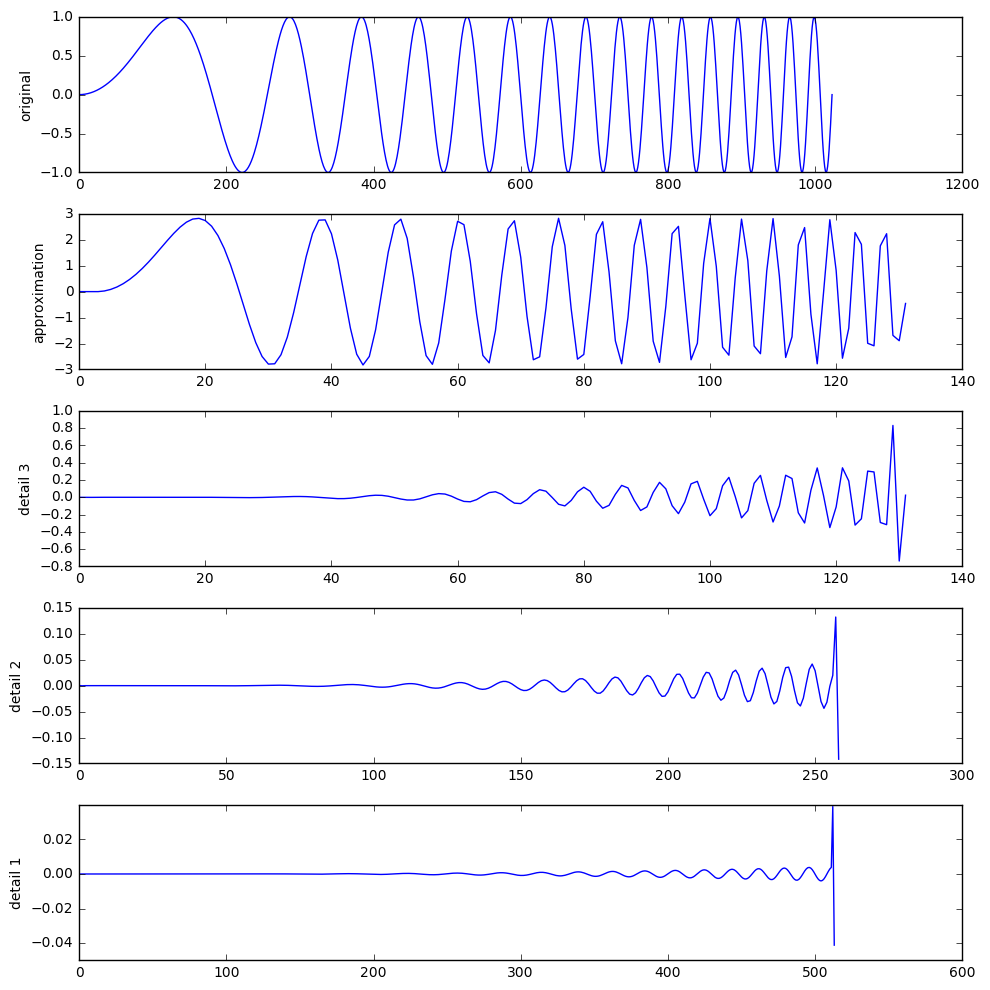

In [57]:
# Lets to a more interesting signal, a ramping sine wave
n = 1024
t = np.linspace(0,4,n)
x = np.sin(2*np.pi*t*t)
cA, cD3, cD2, cD1 = pywt.wavedec(x,'db3',level=3)
fig = plt.figure(figsize=(10,10))
plt.subplot(5,1, 1)
plt.plot(x)
plt.ylabel("original")
plt.subplot(5,1, 2)
plt.plot(cA)
plt.ylabel("approximation")
plt.subplot(5,1, 3)
plt.plot(cD3)
plt.ylabel("detail 3")
plt.subplot(5,1, 4)
plt.plot(cD2)
plt.ylabel("detail 2")
plt.subplot(5,1, 5)
plt.plot(cD1)
plt.ylabel("detail 1")
plt.tight_layout()


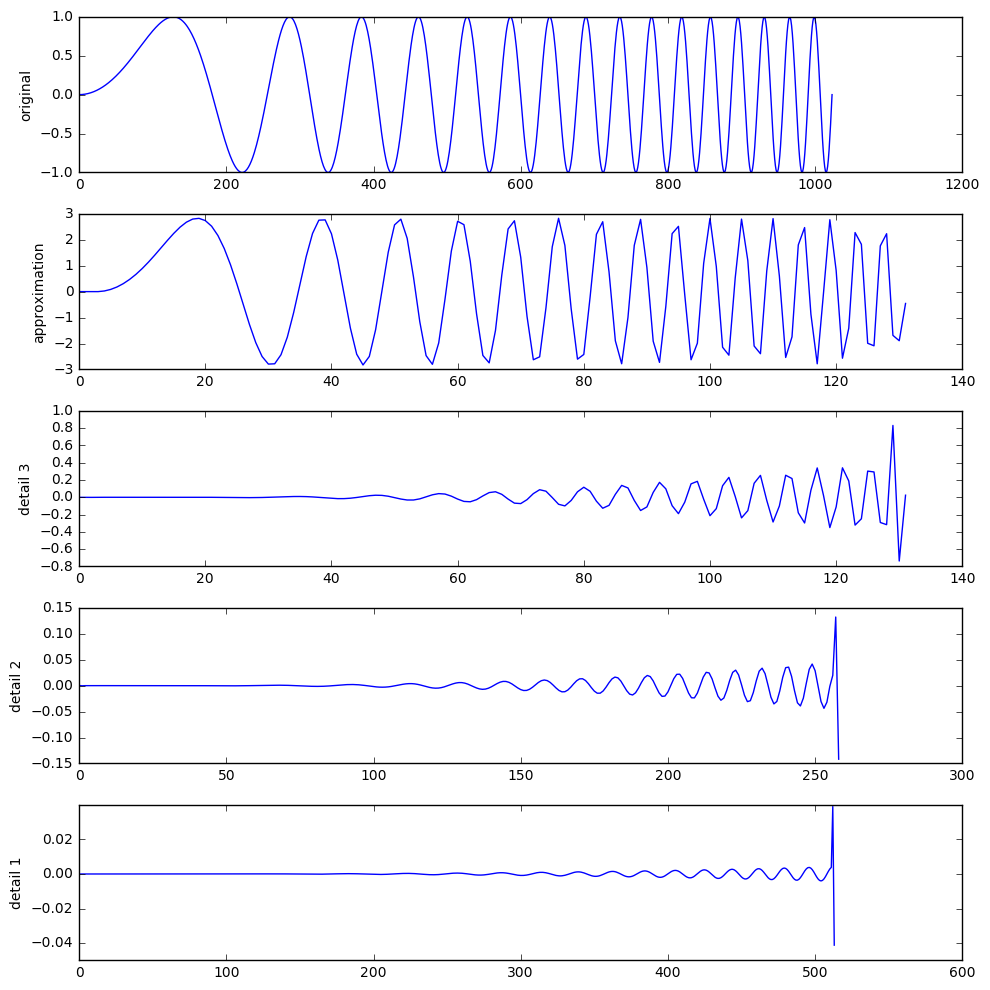

In [58]:
# we should note how to use a list of arrays from the wavelet transform. Interesting syntax to use.
n = 1024
t = np.linspace(0,4,n)
x = np.sin(2*np.pi*t*t)
coeffs = pywt.wavedec(x,'db3',level=3)
fig = plt.figure(figsize=(10,10))
plt.subplot(5,1, 1)
plt.plot(x)
plt.ylabel("original")
plt.subplot(5,1, 2)
plt.plot(coeffs[0])
plt.ylabel("approximation")
plt.subplot(5,1, 3)
plt.plot(coeffs[1])
plt.ylabel("detail 3")
plt.subplot(5,1, 4)
plt.plot(coeffs[2])
plt.ylabel("detail 2")
plt.subplot(5,1, 5)
plt.plot(coeffs[3])
plt.ylabel("detail 1")
plt.tight_layout()

### Doing the inverse wavelet transform (wavelet reconstruction = waverec)

The inverse transform should do a perfect reconstuction. If we zero out some detail coefficents (say at the 1st level), we get an approximate reconstruction. But it is pretty good.

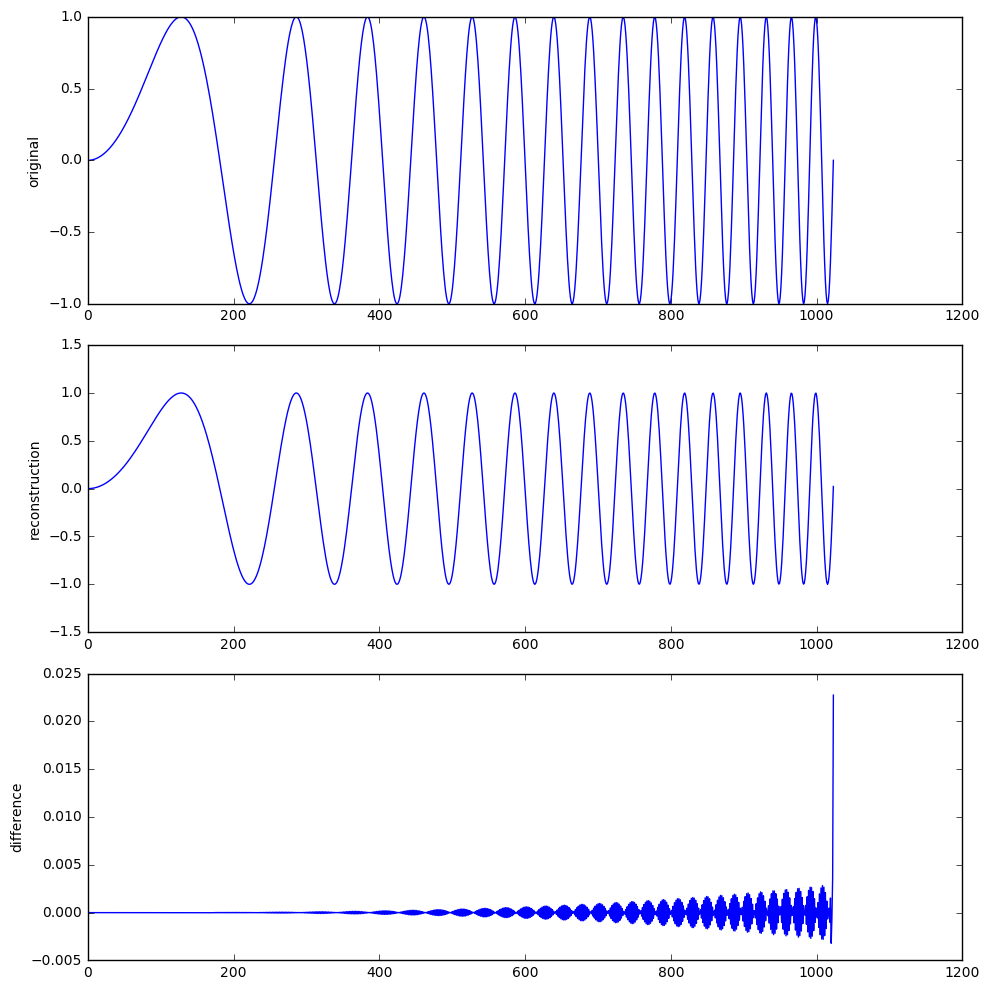

In [59]:
# Let's do a reconstruction, dropping the detail 1 level.
n = 1024
t = np.linspace(0,4,n)
x = np.sin(2*np.pi*t*t)
coeffs = pywt.wavedec(x,'db3',level=3)
coeffs[3] = 0*coeffs[3]   # we zero out the detail 1 level
y = pywt.waverec(coeffs,'db3')
fig = plt.figure(figsize=(10,10))
plt.subplot(3,1, 1)
plt.plot(x)
plt.ylabel("original")
plt.subplot(3,1, 2)
plt.plot(y)
plt.ylabel("reconstruction")
plt.subplot(3,1, 3)
plt.plot(y-x)
plt.ylabel("difference")
plt.tight_layout()

Since we have the inverse transform, we can run it backwards and see what our actually looks like.

We take 6 levels, and insert one non-zero coefficients. db1 will give the square wave (Haar wavelet). db2 is continuous, but jagged. db3, db4 etc are smoother Daubechies wavelets. 

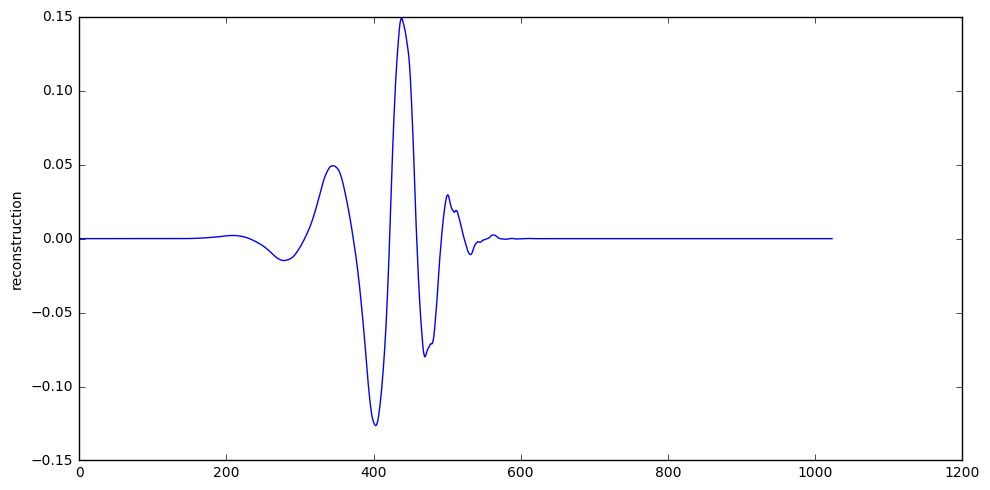

In [60]:
# Let's reconstruct some wavelets
n = 1024
t = np.linspace(0,4,n)
x = 0*t  # we start with nothing
coeffs = pywt.wavedec(x,'db5',level=6)
coeffs[1][10] = 1   # stick in one non-zero value
y = pywt.waverec(coeffs,'db5')
fig = plt.figure(figsize=(10,5))
plt.plot(y)
plt.ylabel("reconstruction")
plt.tight_layout()

## Filter banks and the Wavelet transform

The wavelet transform can be thought of as a a system of filters, usually designed as a pair of filter: one high pass, one low pass. 

In the Haar wavelet case, the two filters have coefficients [-1,1] and [1,1] (or normalized with a square root of 2). By zero padding and taking the fft, we can see the filter response for each.


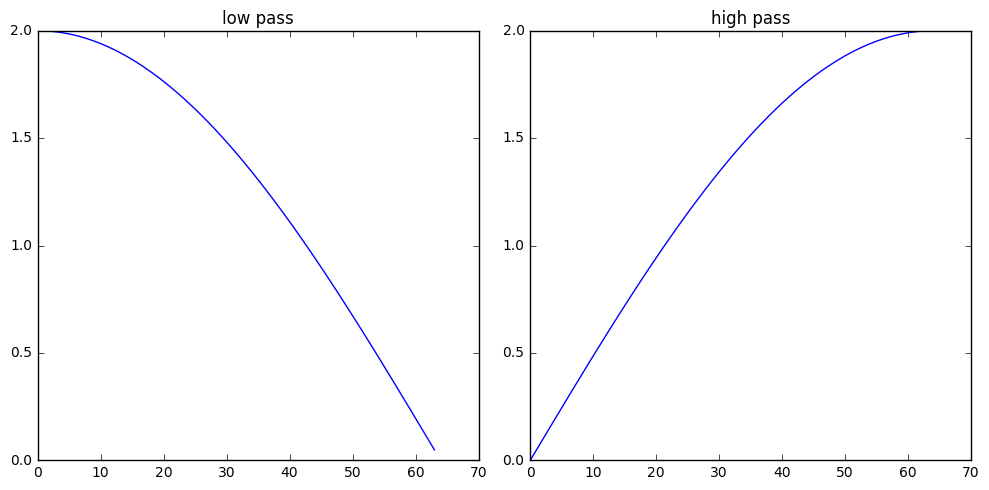

In [61]:
lp = np.zeros(128)
hp = np.zeros(128)
lp[0] = 1
lp[1] = 1
hp[0] = -1
hp[1] = 1
lpfft = np.abs(np.fft.fft(lp))
hpfft = np.abs(np.fft.fft(hp))


fig = plt.figure(figsize=(10,5))
plt.subplot(1,2, 1)
plt.plot(lpfft[0:64])
plt.title("low pass")
plt.subplot(1,2, 2)
plt.plot(hpfft[0:64])
plt.title("high pass")
plt.tight_layout()

We can look at the filter response for the Daubechies wavelet transforms. Basically, for higher order, we get steeper response curves. Try it. 

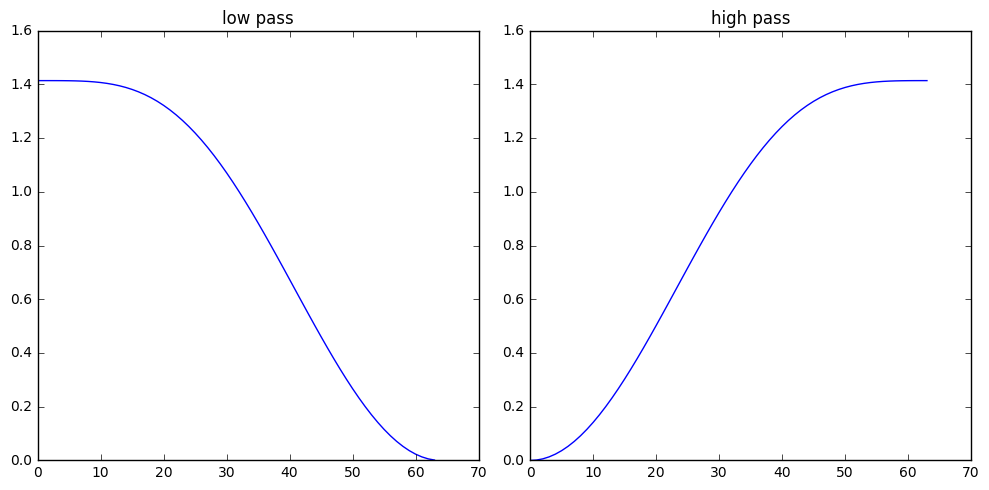

In [62]:
lp = np.zeros(128)
hp = np.zeros(128)
w = pywt.Wavelet('db2')  # change the db1 to sb2m db3 etc
lp[0:len(w.dec_lo)] = w.dec_lo
hp[0:len(w.dec_hi)] = w.dec_hi
lpfft = np.abs(np.fft.fft(lp))
hpfft = np.abs(np.fft.fft(hp))


fig = plt.figure(figsize=(10,5))
plt.subplot(1,2, 1)
plt.plot(lpfft[0:64])
plt.title("low pass")
plt.subplot(1,2, 2)
plt.plot(hpfft[0:64])
plt.title("high pass")
plt.tight_layout()

### Continuous wavelet transform

This is an example from the documents for PyWavelets.

A continuous wavelet transform computes the inner product of the signal with a collection of wavelets of various positions and scales.  With f(t) the signal, the wavelet transform looks like
$$Wf(t,a) = \frac{1}{\sqrt{a}}\int_{-\infty}^\infty f(s) \phi(\frac{s-t}{a}) \, ds,$$
where $\phi$ is the wavelet, $a$ is the scale, and $t$ is the position in time. 

The point is, you get a 2D display from a 1D signal.

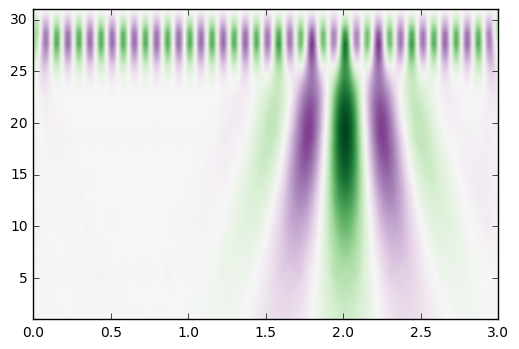

In [74]:
t = np.linspace(0, 3, 300, endpoint=False)
sig = np.cos(2 * np.pi * 7 * t) + np.real(np.exp(-7*(t-2.0)**2)*np.exp(1j*2*np.pi*2*(t-2.0)))
widths = np.arange(1, 31)
cwtmatr, freqs = pywt.cwt(sig, widths, 'mexh')
plt.imshow(cwtmatr, extent=[0, 3, 1, 31], cmap='PRGn', aspect='auto',
  vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())


Can we make sense of this? The original signal was a cosine of frequency 7Hz, plus a localized cosine of 2Hz, near t=2.0.

We do see the 7Hz signal at the top, with 7 green spots per second. Lower down, we see the 2Hz signal (2 green stripes per second), localized on the right near t=2.0

Compare this to the spectrogram, below. Can we make either one better?  [See the NUGAG reference to Gabor transforms](http://grrrr.org/research/software/nsgt/ "Nuhag reference")

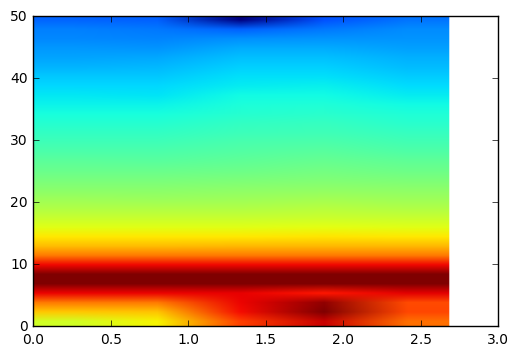

In [75]:
Pxx, freqs, bins, im = plt.specgram(sig, NFFT=64, Fs=100, noverlap=5)

## Images
Let's look at some images and transforms of that. 

Let's take an image and its 2D fft.

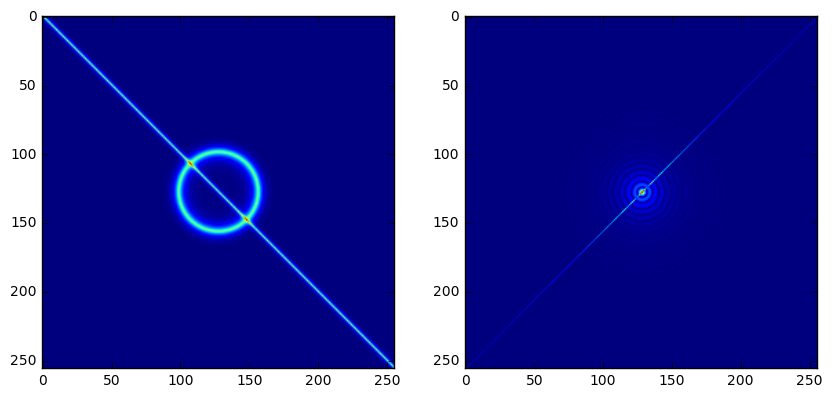

In [65]:
# We use a meshgrid to compute matrices of x and y values, in the square [-1,1]x[-1,1]
# We use Gaussians to build circles and lines
x = np.linspace(-1,1,256)
y = np.linspace(-1,1,256)
X,Y = np.meshgrid(x,y)  # these are matrices!
radius = .05
myimage = np.exp(-np.abs(X*X + Y*Y - .051)/.01) + np.exp(-np.abs(X-Y)/.01) 
#myimage = myimage -np.mean(np.mean(myimage))
myfft = np.abs(np.fft.fftshift(np.fft.fft2(myimage)))
fig = plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(myimage)
plt.subplot(1,2,2)
plt.imshow(myfft)

Now we look at the 2D wavelet transform.

Note the tiling of the output. If we increase the number of levels, you get more little tiles piling up at the top left corner.

The transform looks nice for db1, but maybe not the most useful. Depends on the application.

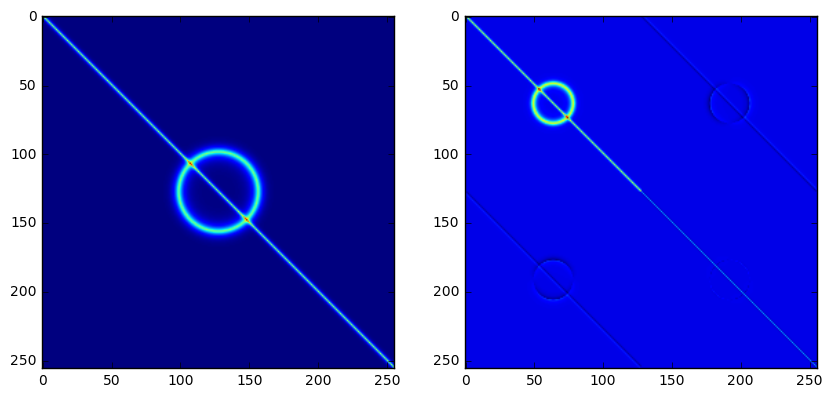

In [66]:
# We use a meshgrid to compute matrices of x and y values, in the square [-1,1]x[-1,1]
# We use Gaussians to build circles and lines
x = np.linspace(-1,1,256)
y = np.linspace(-1,1,256)
X,Y = np.meshgrid(x,y)  # these are matrices!
radius = .05
myimage = np.exp(-np.abs(X*X + Y*Y - .051)/.01) + np.exp(-np.abs(X-Y)/.01) 
coeffs = pywt.wavedec2(myimage, 'db1',level=1)
mywt2, coeff_slices = pywt.coeffs_to_array(coeffs)
fig = plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(myimage)
plt.subplot(1,2,2)
plt.imshow(mywt2)
